In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
#Tested on 1 may 2023


In [2]:
df=pd.read_csv("SaratogaHouses.csv")
df.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [3]:
livingarea=df['livingArea']
landvalue=df['landValue']
rooms=df['rooms']
centralAir= df['centralAir']
price=df['price']


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder= LabelEncoder()
centralAir=encoder.fit_transform(centralAir)

In [6]:
from sklearn.preprocessing import StandardScaler 

In [7]:
n=len(price)
XO=np.ones(n)
X=np.array([XO,livingarea,landvalue,rooms,centralAir]).T
y=np.array(price)
B=np.random.random((5,1)) 

In [8]:
B

array([[0.09807124],
       [0.88951102],
       [0.17989705],
       [0.37396533],
       [0.88406651]])

In [9]:
std=StandardScaler()
X=std.fit_transform(X)

In [10]:
y.shape 

(1728,)

In [11]:
y=y.reshape(-1,1) # 2d array
y=std.fit_transform(y)

In [12]:
y.shape

(1728, 1)

In [13]:
X[:10]  # first 10 columns

array([[ 0.        , -1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 0.        ,  0.31951971, -0.350095  , -0.44981202, -0.76221375],
       [ 0.        ,  0.30499787, -0.77853137,  0.41382706, -0.76221375],
       [ 0.        ,  0.30499787, -0.45291972, -0.88163155, -0.76221375],
       [ 0.        , -1.47634791, -0.5586007 , -1.74527063,  1.31196793],
       [ 0.        , -0.9729241 , -0.58716312,  0.41382706, -0.76221375],
       [ 0.        ,  1.60873645, -0.32153257,  0.41382706, -0.76221375],
       [ 0.        , -0.1500198 , -0.57002567,  0.84564659, -0.76221375],
       [ 0.        , -0.19842594, -0.35295124,  0.41382706, -0.76221375],
       [ 0.        , -0.54695011, -0.38151366, -0.44981202, -0.76221375]])

In [14]:
def cost_function(X,y,B):
    h=np.sum((X.dot(B)-y)**2)/(2*n)
    return h
    

In [15]:
X.dot(B)

array([[-2.14269815],
       [-0.62082651],
       [-0.38784721],
       ...,
       [-2.34075766],
       [-1.53247066],
       [-0.59320325]])

In [16]:
cost_function(X,y,B)

0.7940624243769561

In [23]:
def gradient_descent(X,y,B,epoch,alpha):
    cost_history=[0]*epoch
    for i in range(epoch):
        y_pred=X.dot(B)
        loss=y_pred-y
        gradient=(X.T.dot(loss))/n
        B=B-alpha*gradient
        cost_history[i]=cost_function(X,y,B)
    return cost_history, B
        

In [24]:
B

array([[0.09807124],
       [0.88951102],
       [0.17989705],
       [0.37396533],
       [0.88406651]])

In [25]:
cost, b=gradient_descent(X,y.flatten(),B,epoch=3000,alpha=0.001)

In [26]:
b


array([[ 0.09807124,  0.09807124,  0.09807124, ...,  0.09807124,
         0.09807124,  0.09807124],
       [ 0.11195762,  0.11195762,  0.11195762, ...,  0.11195762,
         0.11195762,  0.11195762],
       [-0.05593579, -0.05593579, -0.05593579, ..., -0.05593579,
        -0.05593579, -0.05593579],
       [-0.0931172 , -0.0931172 , -0.0931172 , ..., -0.0931172 ,
        -0.0931172 , -0.0931172 ],
       [ 0.03165829,  0.03165829,  0.03165829, ...,  0.03165829,
         0.03165829,  0.03165829]])

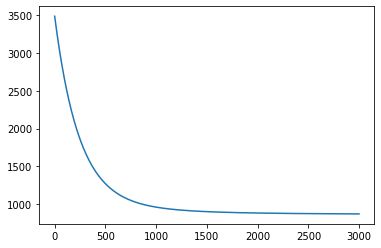

In [20]:
x1=[i for i in range(3000)]
plt.plot(x1,cost)